In [ ]:
import pandas as pd  # Import the pandas library for data manipulation and analysis

# Read the CSV file into a DataFrame and store it in the variable 'df'
df = pd.read_csv("/content/text (1).csv")


In [ ]:

df.head()  # Display the first five rows of the DataFrame 'df'


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
df.shape  # Get the dimensions of the DataFrame 'df'


(416809, 3)

In [ ]:
df['label'].unique()  # Get the unique values in the 'label' column of the DataFrame 'df'


array([4, 0, 2, 1, 5, 3])

In [ ]:
df.isnull().sum()  # Count/find the number of missing values in each column of the DataFrame 'df'


Unnamed: 0    0
text          0
label         0
dtype: int64

In [ ]:
# Remove row that contain null value
df.dropna(subset=['label'], inplace=True)


In [ ]:
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

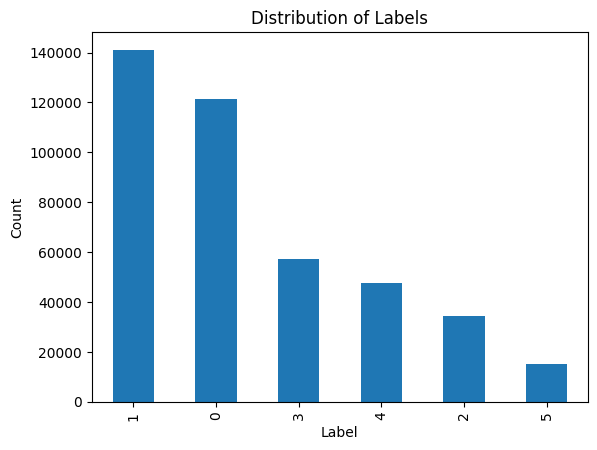

In [ ]:
import matplotlib.pyplot as plt  # Import the matplotlib library for data visualization
# Generate a bar plot of the unique values in the 'label' column
df['label'].value_counts().plot(kind='bar')  # Plot the counts of unique values in the 'label' column as a bar plot
plt.title('Distribution of Labels')  # Set the title of the plot
plt.xlabel('Label')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the plot


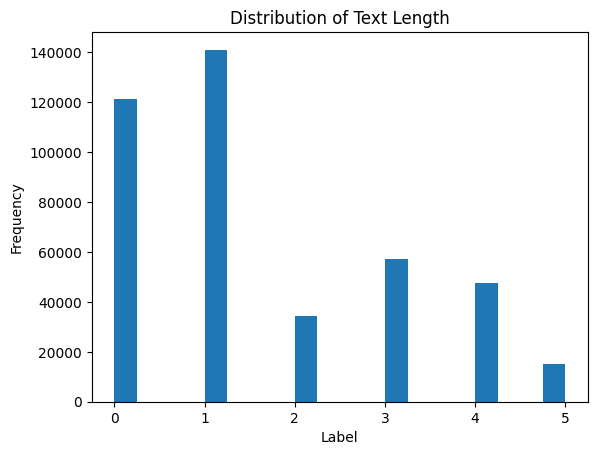

In [ ]:
# Generate a histogram of the 'label' column
plt.hist(df['label'], bins=20)  # Plot a histogram of the 'label' column with 20 bins
plt.title('Distribution of Text Length')  # Set the title of the plot
plt.xlabel('Label')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the plot


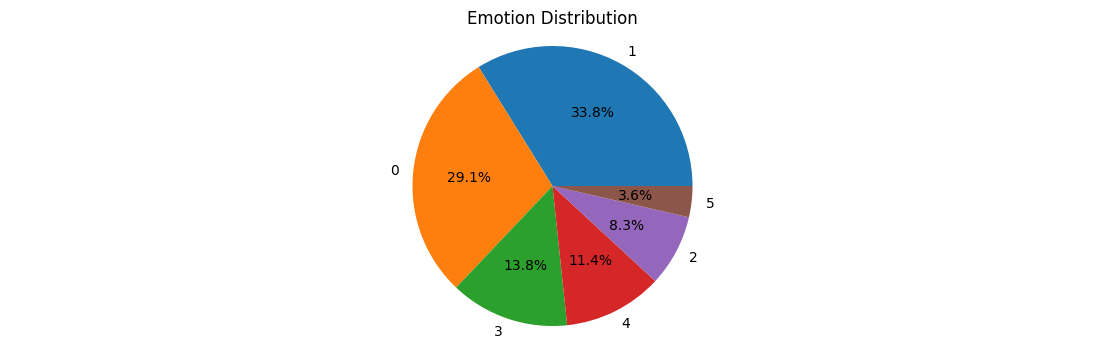

In [ ]:
# Generate a pie chart of the 'label' column
plt.figure(figsize=(14, 4))  # Set the figure size

# Count the occurrences of each label
label_count = df['label'].value_counts()

# Plot a pie chart with the label counts
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')

# Set the title of the plot
plt.title('Emotion Distribution')

# Set the aspect ratio to be equal for a circular pie chart
plt.axis('equal')

# Display the plot
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  # Import the train_test_split function for splitting data
from sklearn.feature_extraction.text import TfidfVectorizer  # Import the TfidfVectorizer for text vectorization
from sklearn.svm import LinearSVC  # Import the LinearSVC classifier
from sklearn.metrics import classification_report  # Import the classification_report for evaluation


In [ ]:
# Split data into features (X) and labels (y)
X = df['text']  # Extract the 'text' column as features (input)
y = df['label']  # Extract the 'label' column as labels (output)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=411)


In [ ]:

X_train #checking the distribution of actuall data and labels are same

32512     i don t know why p feels my heart grow tender ...
225180    im not the type who knows how to walk away pul...
17526     i had it in my head going in that i would only...
310802    i said i have a feeling that i m supposed to k...
78160     i realized that i was feeling rotten for about...
                                ...                        
348082    i feel it is so petty that she cares that much...
57796             i feel like i got something a bit special
385647    i were a songwriter i feel like i would be fea...
332396    i always feel helpless when i cannot take my k...
105436    i mean i just spent an hour having a complicat...
Name: text, Length: 333447, dtype: object

In [ ]:
y_train

32512     2
225180    1
17526     1
310802    4
78160     0
         ..
348082    3
57796     1
385647    4
332396    0
105436    4
Name: label, Length: 333447, dtype: int64

In [ ]:
X_test

239787    ive found myself feeling a bit depressed but m...
74055     ill share it with you dear reader because i am...
220883    i feel like i should apologize for this and ac...
167897    id like the room to have as soon as im feeling...
42374     i am going to have to revise it to feel more c...
                                ...                        
404369    i can t believe the number of years i had spen...
161371    i feel passionate about all people that are br...
350213                                 i still feel frantic
257921    i have a feeling these could grow on me to be ...
143602    i hate this i hate feeling for someone i hate ...
Name: text, Length: 83362, dtype: object

In [ ]:
# Create a TF-IDF vectorizer with a maximum of 10,000 features
tfidf = TfidfVectorizer(max_features=10000)
vectorizer = tfidf  # You can adjust the number of features as needed

# Transform the training text data into TF-IDF vectors
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the testing text data into TF-IDF vectors using the same vectorizer
X_test_tfidf = tfidf.transform(X_test)


# **SVM**

In [ ]:
# Create a Linear Support Vector Classifier (SVM)
svm = LinearSVC()
# Train the SVM classifier using the TF-IDF vectors of the training data
svm.fit(X_train_tfidf, y_train)


LinearSVC()

In [ ]:
# Predict labels for test data using the trained SVM classifier
y_pred = svm.predict(X_test_tfidf)

# Evaluate the classifier
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.94      0.94      0.94     24251
           1       0.92      0.92      0.92     28122
           2       0.77      0.76      0.77      6861
           3       0.90      0.90      0.90     11531
           4       0.84      0.84      0.84      9552
           5       0.73      0.69      0.71      3045

    accuracy                           0.89     83362
   macro avg       0.85      0.84      0.85     83362
weighted avg       0.89      0.89      0.89     83362



# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression classifier
import pickle  # Import pickle for model serialization

# Create a Logistic Regression classifier with specified parameters
clr = LogisticRegression(max_iter=100, random_state=42)

# Train the Logistic Regression classifier using the TF-IDF vectors of the training data
clr.fit(X_train_tfidf, y_train)

# Serialize the trained classifier using pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(clr, file)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Predict labels for test data using the trained Logistic Regression classifier
y_pred = clr.predict(X_test_tfidf)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94     24251
           1       0.92      0.94      0.93     28122
           2       0.82      0.76      0.79      6861
           3       0.90      0.90      0.90     11531
           4       0.85      0.85      0.85      9552
           5       0.79      0.69      0.74      3045

    accuracy                           0.90     83362
   macro avg       0.87      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362



In [ ]:
# Save the trained Logistic Regression classifier
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(clr, file)

# Save the TF-IDF vectorizer
with open('/content/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


# **NaiveBAyes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes classifier
# Instantiate a Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Train the classifier using the TF-IDF vectors of the training data
nb.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
# Predict labels for test data
y_pred = nb.predict(X_test_tfidf)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.95      0.88     24251
           1       0.76      0.97      0.85     28122
           2       0.94      0.39      0.55      6861
           3       0.94      0.74      0.82     11531
           4       0.89      0.65      0.75      9552
           5       0.96      0.19      0.32      3045

    accuracy                           0.82     83362
   macro avg       0.88      0.65      0.70     83362
weighted avg       0.84      0.82      0.80     83362



# **Xgboost**

In [ ]:
import xgboost as xgb  # Import XGBoost library

# Convert the training data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_tfidf, label=y_train)

# Convert the testing data into DMatrix format for XGBoost
dtest = xgb.DMatrix(X_test_tfidf, label=y_test)


In [ ]:
# Define XGBoost parameters
param = {
    'max_depth': 6,  # Maximum depth of a tree
    'eta': 0.3,      # Learning rate
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': 7,  # Number of classes
    'eval_metric': 'merror'  # Evaluation metric
}


In [ ]:
# Train XGBoost model
num_round = 100  # Number of boosting rounds
bst = xgb.train(param, dtrain, num_round)



In [ ]:

# Predict labels for test data
y_pred = bst.predict(dtest)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     24251
           1       0.93      0.90      0.91     28122
           2       0.75      0.90      0.82      6861
           3       0.91      0.89      0.90     11531
           4       0.88      0.82      0.85      9552
           5       0.69      0.90      0.78      3045

    accuracy                           0.90     83362
   macro avg       0.85      0.89      0.87     83362
weighted avg       0.90      0.90      0.90     83362



# **Random FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier

# Instantiate Random Forest classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the classifier
rf.fit(X_train_tfidf, y_train)


KeyboardInterrupt: 

In [ ]:
# Predict labels for test data using the trained Random Forest classifier
y_pred = rf.predict(X_test_tfidf)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


# **kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Import K-Nearest Neighbors classifier

# Instantiate K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Train the classifier
knn.fit(X_train_tfidf, y_train)


NameError: name 'X_train_tfidf' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

# Predict labels for test data using the trained KNN classifier
y_pred = knn.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


NameError: name 'X_test_tfidf' is not defined

# **check trained model**

In [ ]:
# Load necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

# Load the trained model and vectorizer
with open('/content/logistic_regression_model.pkl', 'rb') as file:
    clf = pickle.load(file)

with open('/content/tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Function to predict the class of input text
def predict_emotion(input_text):
    # Vectorize the input text
    input_text_vectorized = vectorizer.transform([input_text])

    # Predict the class
    predicted_class = clf.predict(input_text_vectorized)[0]

    return predicted_class

# Example usage
input_text = input("Enter a text: ")
predicted_class = predict_emotion(input_text)
print("Predicted class:", predicted_class)
